<a href="https://colab.research.google.com/github/rushikeshnaik779/tfcerti/blob/main/MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master Steps to build nice model
1. Become one with the data 
2. Preprocess the data 
3. Create a model 
4. Fit the model 
5. Evaluate the model 
6. Adjust different hyperparameter and improve the model ( Try to beat baseline/reduce overfitting)
7. Repeat until satisfied 


# import and become one with tthe data 

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-19 07:05:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   263MB/s    in 1.9s    

2021-08-19 07:05:36 (263 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 
# walk through 10 classes of food image data 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_all_data' .
There are 10 directories and 0 images in '10_food_classes_all_data/test' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' 

In [ ]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Aug 19 07:05 .
drwxr-xr-x  1 root root 4096 Aug 19 07:05 ..
drwxr-xr-x 12 root root 4096 Aug 19 07:05 test
drwxr-xr-x 12 root root 4096 Aug 19 07:05 train


In [ ]:
# Setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"

In [ ]:
# let's get the classnames 
import pathlib
import numpy as np 

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# let's get the subdirectories ( these are our class names)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random 

def view_random_image(target_dir, target_class):
    # Setup the target directory (we will view images from here )
    target_folder = target_dir+target_class 

    # get random images path 
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+'/'+random_image[0])

    plt.imshow(img)
    plt.title(target_class, size=22)
    plt.axis("off")

    print(f'Image shape: {img.shape}')

    return img

['3862289.jpg']
Image shape: (512, 512, 3)


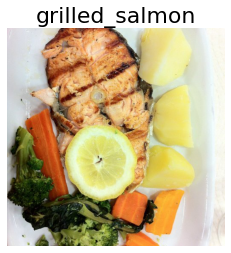

In [ ]:
img = view_random_image(target_dir=train_dir,
                        target_class = random.choice(class_names))

# 2. Preprocess the data(Prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


# load data in from directories and turn it inot batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32, 
                                               class_mode = "categorical",
                                               
                                               )


test_data = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224),
    batch_size=32, 
    class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3 create a CNN model 


In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# set random 
tf.random.set_seed(42)

model_1 = Sequential([
                      Conv2D(10, 3, input_shape=(224, 224, 3)),
                      Activation(activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
                      
])



In [ ]:
# compile the model 
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer  = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
hitory_1 = model_1.fit(train_data, 
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 43s 183ms/step - loss: 0.1871 - accuracy: 0.9457 - val_loss: 4.0453 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 0.0626 - accuracy: 0.9837 - val_loss: 5.0211 - val_accuracy: 0.2880
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 0.0287 - accuracy: 0.9937 - val_loss: 5.4376 - val_accuracy: 0.2896
Epoch 4/5
235/235 [==============================] - 43s 182ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 5.5389 - val_accuracy: 0.2584
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.0263 - accuracy: 0.9931 - val_loss: 6.5482 - val_accuracy: 0.2756


## Evaluate the model 

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 6.5482 - accuracy: 0.2756


[6.548153400421143, 0.27559998631477356]

In [ ]:
# Plot the validation and trianing curves separately 

def plot_loss_curves(history):
    """
    returns seprate loss curves

    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]


    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # plotting loss
    plt.plot(epochs, loss, label="traiing_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    # plotting accuracy 
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="testing accuracy")
    plt.title("Accuracies")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

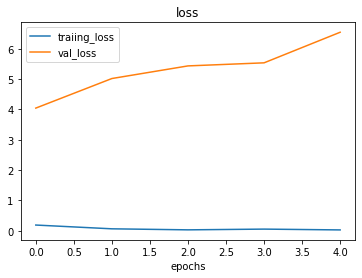

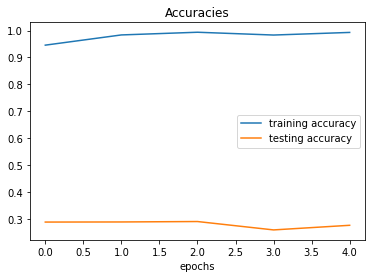

In [ ]:
plot_loss_curves(hitory_1)


# Adjusting Hyperparameters to reduce the overfitting 

* Get more data 
* Simplify the mode 
* Data Augmentation
* Use transfer Learnings 

# How about we try and simplify model

* let's remove the convolutional layers 

In [ ]:
model_2 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


In [ ]:
model_2.fit(
            train_data, 
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = len(test_data)
)

Epoch 1/5
235/235 [==============================] - 41s 173ms/step - loss: 2.1087 - accuracy: 0.2447 - val_loss: 1.9208 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 40s 171ms/step - loss: 1.7273 - accuracy: 0.4140 - val_loss: 1.9043 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 40s 172ms/step - loss: 1.3795 - accuracy: 0.5492 - val_loss: 1.9282 - val_accuracy: 0.3460
Epoch 4/5
235/235 [==============================] - 40s 171ms/step - loss: 0.9617 - accuracy: 0.7016 - val_loss: 2.2011 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 40s 172ms/step - loss: 0.5591 - accuracy: 0.8432 - val_loss: 2.5854 - val_accuracy: 0.2980


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 2.5854 - accuracy: 0.2980


[2.585414409637451, 0.2980000078678131]

# Data Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 0.2, 
    shear_range=0.2, 
    zoom_range = 0.2, 
    width_shift_range = 0.2, 
    height_shift_range=0.3,
    horizontal_flip = True
)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir, 
    target_size = (224, 224), 
    batch_size=32, 
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224,3)), 
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")

])


model_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_3 = model_3.fit(
    train_data_augmented, 
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)

)

Epoch 1/5
235/235 [==============================] - 104s 443ms/step - loss: 2.2168 - accuracy: 0.2008 - val_loss: 2.0293 - val_accuracy: 0.2708
Epoch 2/5
235/235 [==============================] - 104s 443ms/step - loss: 2.0843 - accuracy: 0.2628 - val_loss: 1.9754 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0557 - accuracy: 0.2768 - val_loss: 1.9693 - val_accuracy: 0.3028
Epoch 4/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0170 - accuracy: 0.2917 - val_loss: 1.9397 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 104s 443ms/step - loss: 2.0044 - accuracy: 0.2985 - val_loss: 1.8191 - val_accuracy: 0.3716


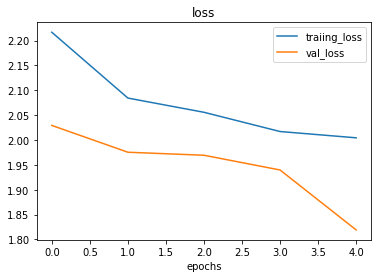

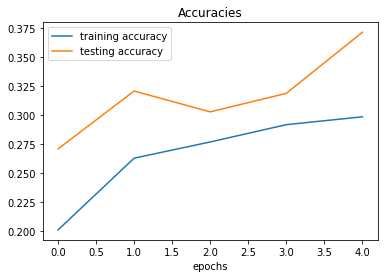

In [ ]:
plot_loss_curves(history_3)

# Repeat until satisfied 